<a href="https://colab.research.google.com/github/shabthi/forage-quantium/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import re

In [ ]:
purchase_behaviour_df = pd.read_csv('/content/drive/MyDrive/QVI_purchase_behaviour.csv')
transaction_data_df = pd.read_excel('/content/drive/MyDrive/QVI_transaction_data.xlsx')

# Data Exploration

**Examine Transacction Data**

In [ ]:
print(transaction_data_df.shape)
print(transaction_data_df.dtypes)
print(transaction_data_df.head())
print(transaction_data_df.columns[transaction_data_df.isnull().any()])
transaction_data_df[['PROD_QTY','TOT_SALES']].describe()

(264836, 8)
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
Index([], dtype='obje

,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


**Obeservations**

*   The transaction dtaa has around 200k data with 8 columns
*   The DATE column has the data type int64 - this needs to be converted.
*   No column has null values
*   Around 74k chip transactions, with 33 unique chip products







In [ ]:
#Convert DATE column
def date_convert(date):
  new_date = datetime.datetime.strptime('1899-12-30', "%Y-%m-%d") + datetime.timedelta(date)
  return new_date

transaction_data_df['DATE'] = transaction_data_df['DATE'].map(lambda x:date_convert(x),)
transaction_data_df['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [ ]:
prod_names = transaction_data_df['PROD_NAME'].unique()
print(prod_names[0:5])
print('Number of total unique prod_name '+str(len(transaction_data_df['PROD_NAME'].unique())))
chip_transaction_df = transaction_data_df.loc[transaction_data_df['PROD_NAME'].str.contains('chip',False)]
print(chip_transaction_df.shape)
print(chip_transaction_df['PROD_NAME'].unique())
print('Number of unique prod_name with chips '+str(len(chip_transaction_df['PROD_NAME'].unique())))

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g']
Number of total unique prod_name 114
(74570, 8)
['Natural Chip        Compny SeaSalt175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Thins Chips Light&  Tangy 175g'
 'Doritos Corn Chip Southern Chicken 150g'
 'Smiths Chip Thinly  Cut Original 175g'
 'Thins Chips         Originl saltd 175g'
 'Natural ChipCo      Hony Soy Chckn175g'
 'Thins Chips Seasonedchicken 175g' 'Doritos Corn Chips  Original 170g'
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g'
 'Natural Chip Co     Tmato Hrb&Spce 175g'
 'Smiths Crinkle Cut  Chips Original 170g'
 'Cobs Popd Sea Salt  Chips 110g'
 'Smiths Crinkle Cut  Chips Chs&Onion170g'
 'French Fries Potato Chips 175g'
 'Doritos Corn Chips  Chee

In [ ]:
def remove_num_special_char(string):
  final_word = []
  words = string.split(' ')
  for word in words:
    if(bool(re.match('^[a-zA-Z]*$',word))==True) and not word == '':
      final_word.append(word)
  return ' '.join(final_word)

transaction_data_df['PROD_NAME_CLEANED'] = transaction_data_df['PROD_NAME'].apply(remove_num_special_char)
transaction_data_df['PROD_NAME_CLEANED']

0                        Natural Chip Compny
1                           CCs Nacho Cheese
2           Smiths Crinkle Cut Chips Chicken
3                         Smiths Chip Thinly
4                      Kettle Tortilla Chili
                         ...                
264831    Kettle Sweet Chilli And Sour Cream
264832               Tostitos Splash Of Lime
264833                      Doritos Mexicana
264834    Doritos Corn Chip Mexican Jalapeno
264835               Tostitos Splash Of Lime
Name: PROD_NAME_CLEANED, Length: 264836, dtype: object

In [ ]:
prod_summary_df = transaction_data_df[['PROD_NAME_CLEANED','PROD_NAME','TOT_SALES']].groupby(['PROD_NAME_CLEANED','PROD_NAME'])['TOT_SALES'] \
      .count().reset_index(name='count') \
      .sort_values(['count'], ascending=False)
prod_summary_df

,PROD_NAME_CLEANED,PROD_NAME,count
32,Kettle Mozzarella Basil Pesto,Kettle Mozzarella Basil & Pesto 175g,3304
42,Kettle Tortilla Chili,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
8,Cobs Popd Chips,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
102,Tyrrells Crisps Ched Chives,Tyrrells Crisps Ched & Chives 165g,3268
9,Cobs Popd Sea Salt Chips,Cobs Popd Sea Salt Chips 110g,3265
...,...,...,...
62,RRD Pc Sea Salt,RRD Pc Sea Salt 165g,1431
112,Woolworths Medium Salsa,Woolworths Medium Salsa 300g,1430
43,NCC Sour Cream Garden Chives,NCC Sour Cream & Garden Chives 175g,1419
21,French Fries Potato Chips,French Fries Potato Chips 175g,1418


In [ ]:
chip_transaction_df = transaction_data_df.loc[transaction_data_df['PROD_NAME'].str.contains(".*chip.*",False)]
print('Number of unique prod_name with chips '+str(len(chip_transaction_df['PROD_NAME'].unique())))
chip_summary_df = chip_transaction_df[['PROD_NAME_CLEANED','PROD_NAME','TOT_SALES']].groupby(['PROD_NAME_CLEANED','PROD_NAME'])['TOT_SALES'] \
      .count().reset_index(name='count') \
      .sort_values(['count'], ascending=False)
chip_summary_df

Number of unique prod_name with chips 33


,PROD_NAME_CLEANED,PROD_NAME,count
0,Cobs Popd Chips,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
1,Cobs Popd Sea Salt Chips,Cobs Popd Sea Salt Chips 110g,3265
21,Smiths Crnkle Chip Orgnl Big Bag,Smiths Crnkle Chip Orgnl Big Bag 380g,3233
26,Thins Potato Chips Hot Spicy,Thins Potato Chips Hot & Spicy 175g,3229
5,Doritos Corn Chips Cheese Supreme,Doritos Corn Chips Cheese Supreme 170g,3217
3,Doritos Corn Chip Mexican Jalapeno,Doritos Corn Chip Mexican Jalapeno 150g,3204
16,Smiths Crinkle Chips Salt Vinegar,Smiths Crinkle Chips Salt & Vinegar 330g,3197
25,Thins Chips Tangy,Thins Chips Light& Tangy 175g,3188
4,Doritos Corn Chip Southern Chicken,Doritos Corn Chip Southern Chicken 150g,3172
6,Doritos Corn Chips Nacho Cheese,Doritos Corn Chips Nacho Cheese 170g,3160


In [ ]:
chip_transaction_df[['PROD_QTY','TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,74570.000000,74570.000000
mean,1.904264,6.860511
std,0.343675,2.256661
min,1.000000,1.900000
25%,2.000000,5.800000
50%,2.000000,6.600000
75%,2.000000,7.800000
max,5.000000,29.500000


In [ ]:
chip_transaction_df.loc[transaction_data_df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED


In [ ]:
transaction_data_df.loc[transaction_data_df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme


**Observation**
The transaction that had 200 chips has the prod_name as **Dorito Corn Chp Supreme 380g**. Thus it did get filtered in the chip transactions

In [ ]:
#checking the other transactions of the above customer
transaction_data_df.loc[transaction_data_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme


In [ ]:
date_transaction_df = transaction_data_df.groupby(['DATE'])['TXN_ID'] \
      .count().reset_index(name='NUM_OF_TRANSACTIONS') \
      .sort_values(['DATE'], ascending=True)
date_transaction_df

,DATE,NUM_OF_TRANSACTIONS
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


In [ ]:
#find the missing date
print(pd.date_range(start="2018-07-01", end="2019-06-30").difference(transaction_data_df['DATE']))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


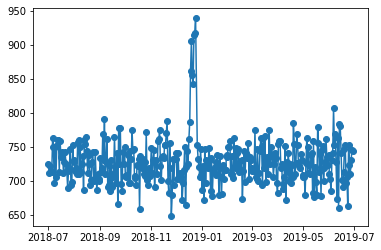

In [ ]:
#plot transactions to check the trend
plt.plot(date_transaction_df["DATE"],date_transaction_df["NUM_OF_TRANSACTIONS"], marker='o')
plt.show()

In [ ]:
missing_date = [datetime.datetime.strptime('2018-12-25', "%Y-%m-%d"), 0]
date_transaction_df= date_transaction_df.append(pd.Series(missing_date, index = ["DATE","NUM_OF_TRANSACTIONS"]), 
           ignore_index=True)


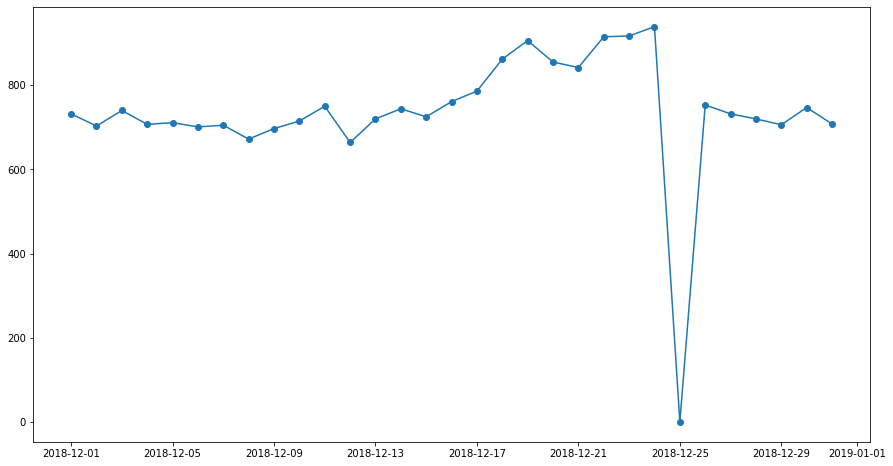

In [ ]:
#get december transaction data and plot them 
a = date_transaction_df['DATE'] > '2018-11-30'
b = date_transaction_df['DATE'] <= '2018-12-31'
december_data_df = date_transaction_df[a & b].sort_values(['DATE'], ascending=True)

#

#plot transactions to check the trend
plt.figure(figsize=(15,8))
plt.plot(december_data_df["DATE"],december_data_df["NUM_OF_TRANSACTIONS"], marker='o')
plt.show()

**Package Size Analysis**

In [ ]:
def pack_size(string):
  size = re.findall(r'\d+', string)
  
  return size[0]


transaction_data_df['SIZE']= transaction_data_df['PROD_NAME'].apply(pack_size)

transaction_data_df[['SIZE','PROD_NAME']]
transaction_data_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED,SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla Chili,150
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno,150


In [ ]:
#convert size into integer 
transaction_data_df['SIZE'] = pd.to_numeric(transaction_data_df['SIZE'])
transaction_data_df.dtypes

DATE                 datetime64[ns]
STORE_NBR                     int64
LYLTY_CARD_NBR                int64
TXN_ID                        int64
PROD_NBR                      int64
PROD_NAME                    object
PROD_QTY                      int64
TOT_SALES                   float64
PROD_NAME_CLEANED            object
SIZE                          int64
dtype: object

In [ ]:
print('Min size ', transaction_data_df['SIZE'].min())
print('Max size ', transaction_data_df['SIZE'].max())

Min size  70
Max size  380


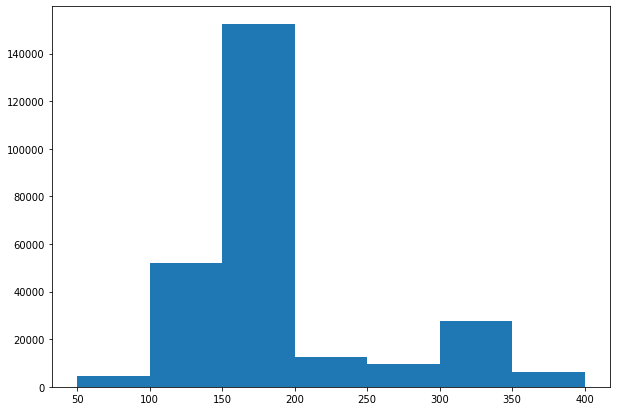

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
n_bins = 31
ax.hist(transaction_data_df['SIZE'],bins = [50,100,150,200,250,300,350,400])
# Show plot
plt.show()

**Brand Name Analysis**

In [ ]:
#Identify brand names
transaction_data_df['BRAND']= transaction_data_df['PROD_NAME_CLEANED'].apply(lambda x: x.split()[0])
print(transaction_data_df['BRAND'].unique())
transaction_data_df[['BRAND','PROD_NAME_CLEANED']]

['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']


,BRAND,PROD_NAME_CLEANED
0,Natural,Natural Chip Compny
1,CCs,CCs Nacho Cheese
2,Smiths,Smiths Crinkle Cut Chips Chicken
3,Smiths,Smiths Chip Thinly
4,Kettle,Kettle Tortilla Chili
...,...,...
264831,Kettle,Kettle Sweet Chilli And Sour Cream
264832,Tostitos,Tostitos Splash Of Lime
264833,Doritos,Doritos Mexicana
264834,Doritos,Doritos Corn Chip Mexican Jalapeno


In [ ]:
#clean brand names
transaction_data_df['BRAND_CLEANED'] = transaction_data_df['BRAND']
unique_brand_names = {'Smiths':'Smith','Woolworths':'WW','Infuzions':'Infzns','Red':'RRD','Snbts':'Sunbites','Natural':'NCC'}
transaction_data_df['BRAND_CLEANED'].replace(unique_brand_names)

0              NCC
1              CCs
2            Smith
3            Smith
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND_CLEANED, Length: 264836, dtype: object

**Customer Data Analysis**

In [ ]:
print(purchase_behaviour_df.shape)
print(purchase_behaviour_df.dtypes)
print(purchase_behaviour_df.head())

(72637, 3)
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [ ]:
purchase_behaviour_df.groupby(purchase_behaviour_df['PREMIUM_CUSTOMER']).count()

,LYLTY_CARD_NBR,LIFESTAGE
PREMIUM_CUSTOMER,,
Budget,24470,24470
Mainstream,29245,29245
Premium,18922,18922


In [ ]:
purchase_behaviour_df.groupby(purchase_behaviour_df['LIFESTAGE']).count()

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER
LIFESTAGE,,
MIDAGE SINGLES/COUPLES,7275,7275
NEW FAMILIES,2549,2549
OLDER FAMILIES,9780,9780
OLDER SINGLES/COUPLES,14609,14609
RETIREES,14805,14805
YOUNG FAMILIES,9178,9178
YOUNG SINGLES/COUPLES,14441,14441


In [ ]:
merged_df = pd.merge(
    transaction_data_df,
    purchase_behaviour_df,
    how="left",
    on='LYLTY_CARD_NBR'
)

In [ ]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_NAME_CLEANED,SIZE,BRAND,BRAND_CLEANED,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny,175,Natural,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese,175,CCs,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken,170,Smiths,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly,175,Smiths,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla Chili,150,Kettle,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream,175,Kettle,Kettle,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime,175,Tostitos,Tostitos,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana,170,Doritos,Doritos,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno,150,Doritos,Doritos,YOUNG SINGLES/COUPLES,Premium


In [ ]:
#check for missing customer data
merged_df.isnull().any()

DATE                 False
STORE_NBR            False
LYLTY_CARD_NBR       False
TXN_ID               False
PROD_NBR             False
PROD_NAME            False
PROD_QTY             False
TOT_SALES            False
PROD_NAME_CLEANED    False
SIZE                 False
BRAND                False
BRAND_CLEANED        False
LIFESTAGE            False
PREMIUM_CUSTOMER     False
dtype: bool

**No missing customer data**

In [ ]:
#Save data set
merged_df.to_csv('/content/drive/MyDrive/QVI_merged.csv')

# Data Analysis

In [ ]:
merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               35514.80
                        Mainstream           90803.85
                        Premium              58432.65
NEW FAMILIES            Budget               21928.45
                        Mainstream           17013.90
                        Premium              11491.10
OLDER FAMILIES          Budget              168363.25
                        Mainstream          103445.55
                        Premium              81958.40
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132263.15
RETIREES                Budget              113147.80
                        Mainstream          155677.05
                        Premium              97646.05
YOUNG FAMILIES          Budget              139345.85
                        Mainstream           92788.75
                        Premium          

In [ ]:
merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().orderby

AttributeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()

In [ ]:
#date conversiondatetime.datetime.strptime('1899-12-30', "%Y-%m-%d") + datetime.timedelta(transaction_data['DATE'])
date  = 

In [ ]:
purchase_behaviour.head